# Neurel Network Classification
## Binary Class Classification

In [1641]:
import torch
import torch.nn as nn
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

(1000, 2) (1000,)


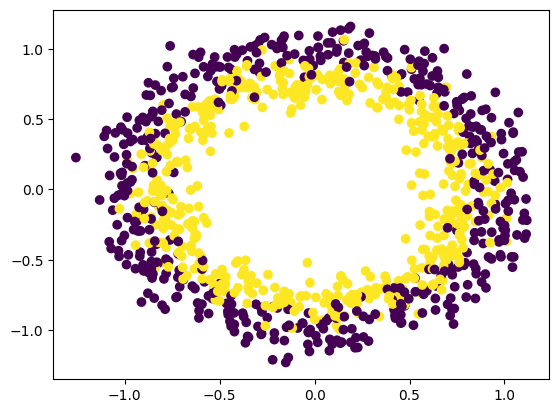

In [1642]:
from sklearn.datasets import make_circles
n_samples=1000
X, y = make_circles(n_samples, noise=0.1, random_state=42)

print(X.shape, y.shape)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [1643]:
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "y": y})

circles.value_counts("y")

y
0    500
1    500
Name: count, dtype: int64

In [1644]:
# Make into tensors and create test and training datasets
X = torch.FloatTensor(X)
y = torch.FloatTensor(y)

# Split into training and test datasets manually
# X_train = X[:800]
# X_test = X[800:]
# y_train = y[:800]
# y_test = y[800:]

# Use sklearn to split into training and test datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Reshape y_train and y_test
y_train = y_train.unsqueeze(1)
y_test = y_test.unsqueeze(1)

print("Training shape:", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training shape: torch.Size([800, 2]) torch.Size([800, 1])
Testing Shape torch.Size([200, 2]) torch.Size([200, 1])


In [1645]:
# Device Agnostic Code
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# Create model for binary classifier
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size, bias=True)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size, bias=True)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layer1(x) 
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        # x = self.sigmoid(x)
        return x

In [1646]:
# Hyperparameters
input_size = 2
hidden_size = 10

learning_rate = 0.1
num_epochs = 1000

model1 = NeuralNet(input_size, hidden_size)
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)
loss = nn.BCEWithLogitsLoss() # Binary Cross Entropy Loss with Logits


<class 'torch.Tensor'>
<class 'torch.Tensor'>
Epoch 0, Loss 0.702984
Epoch 100, Loss 0.691054
Epoch 200, Loss 0.689412
Epoch 300, Loss 0.687562
Epoch 400, Loss 0.685566
Epoch 500, Loss 0.683241
Epoch 600, Loss 0.680184
Epoch 700, Loss 0.675802
Epoch 800, Loss 0.668748
Epoch 900, Loss 0.657760


Text(0, 0.5, 'Accuracy')

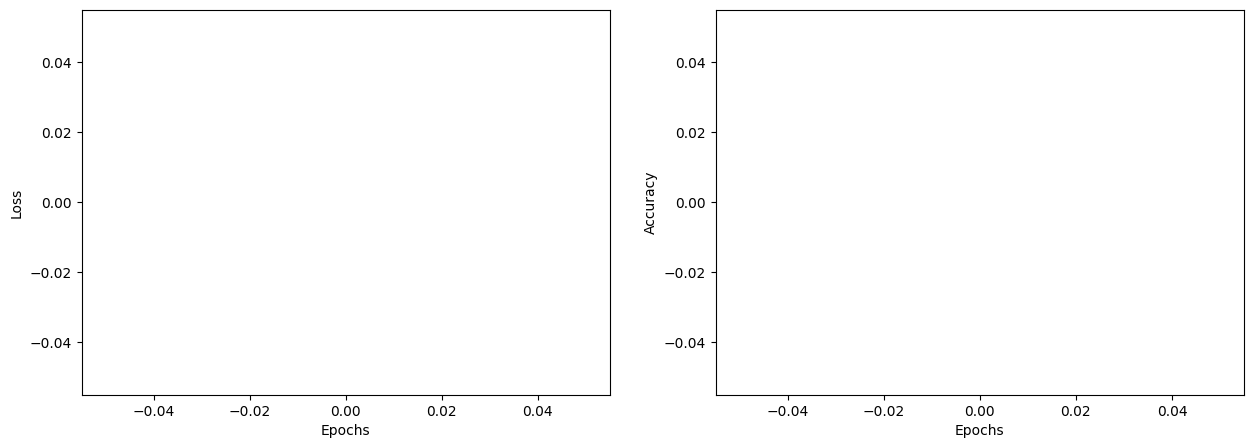

In [1647]:
# Training loop
torch.manual_seed(42)
def train(model : nn.Module , epochs: int, 
          X_train: torch.Tensor, y_train: torch.Tensor):
    
    # Keep track of loss
    history = { "train_loss": [], "train_acc": []}
    
    for epoch in range(epochs):
        model.train()
        # Forward pass        
        y_pred = model(X_train)
        # y_pred = torch.round(torch.sigmoid(y_pred))
        l = loss(y_pred, y_train)

        # Backward pass
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if epoch % 100 == 0:
            print("Epoch %d, Loss %f" % (epoch, l.item()))
            
    return history
    

print(type(X_train))
print(type(y_train))
history = train(model1, num_epochs, X_train, y_train)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].plot(history["train_loss"], label="Train Loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")

axes[1].plot(history["train_acc"], label="Train Accuracy")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")

(200, 1)
[[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]]
Accuracy: 0.72


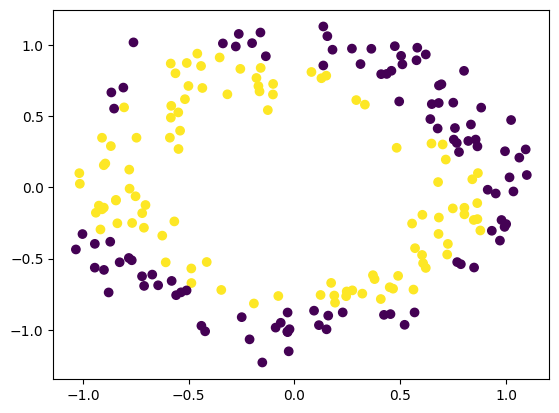

In [1648]:
model1.eval()
with torch.inference_mode():
    y_pred = model1(X_test)
    
# Convert to numpy array
y_pred = torch.sigmoid(y_pred)
y_pred = torch.round(y_pred)
y_pred = y_pred.detach().numpy()


plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
print(y_pred.shape)
print(y_pred[:10])

# Calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
    
    

In [1649]:
import requests
from pathlib import Path

# Download helper functins from Learn PyTorch repo ()
if Path("helper_functions.py").is_file():
    print("helper_functions.py exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "w") as f:
        f.write(request.text)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py exists


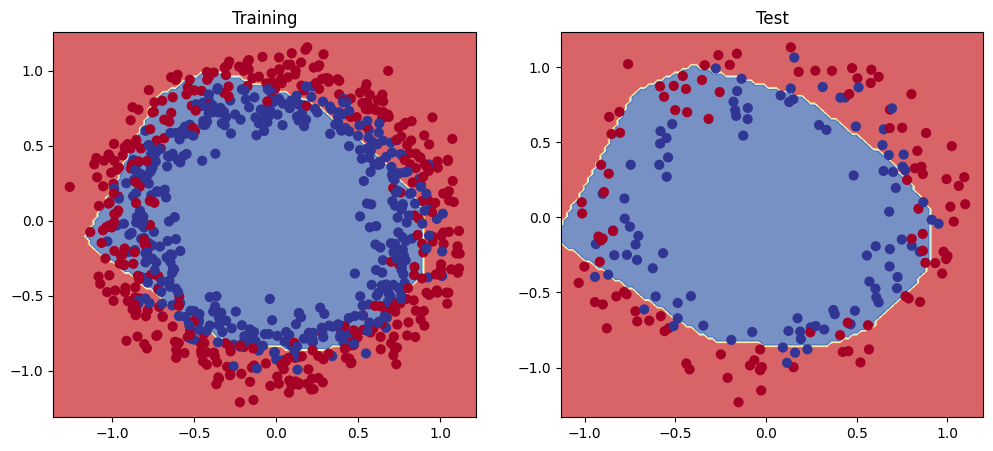

In [1650]:
# Plot decision boundary
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

## Multiclass Classification

torch.Size([1000, 2]) torch.Size([1000])
torch.Size([800, 2]) torch.Size([800]) torch.Size([200, 2]) torch.Size([200])
tensor([0, 1, 2, 3])
torch.float32 torch.int64


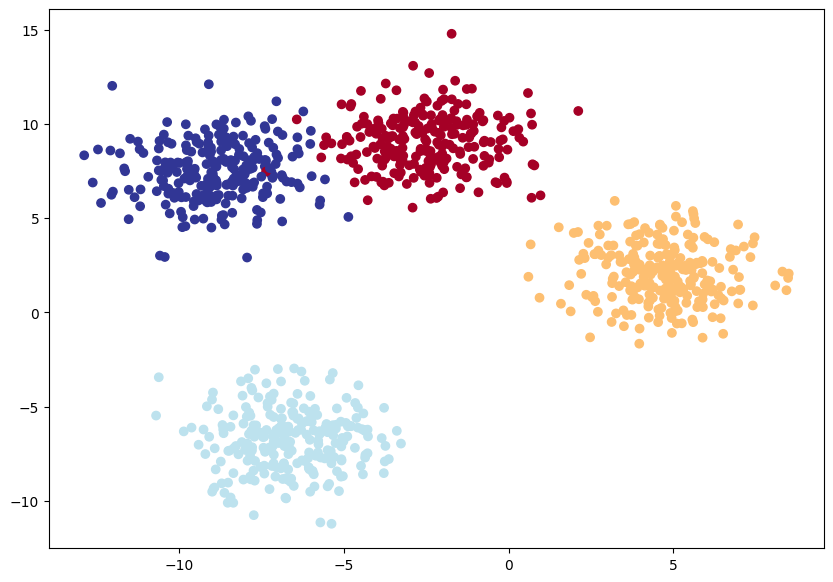

In [1651]:
import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES, 
                            centers=NUM_CLASSES, 
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# Turn into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

print(X_blob.shape, y_blob.shape)

# Split into training and test datasets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                        y_blob, 
                                                                        test_size=0.2, random_state=RANDOM_SEED)
print(X_blob_train.shape, y_blob_train.shape, X_blob_test.shape, y_blob_test.shape)
print(y_blob.unique())

print(X_blob_train.dtype, y_blob_train.dtype)


plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)


In [1652]:
# Create device agnostic code
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [1653]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_size=8):
        """Initializes multi-class classification model for blobs dataset.
        
        Args:
            input_features (int): Number of input features (same as number of columns in dataset)
            output_features (int): Number of output features (same as number of classes in dataset)
            hidden_size (int): Hidden size of hidden layer.
            
        Returns:
            None
        
        Example:
        """
        super(BlobModel, self).__init__()
        self.layer1 = nn.Linear(input_features, output_features)
        self.layer2 = nn.Linear(output_features, hidden_size)
        self.relu = nn.ReLU()
        self.layer3 = nn.Linear(hidden_size, output_features)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        # x = self.softmax(x)
        return x
    

In [1654]:
model2 = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES)
print(model)

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)

BlobModel(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=8, bias=True)
  (relu): ReLU()
  (layer3): Linear(in_features=8, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)


In [1655]:
def train(model: nn.Module, X_train: torch.Tensor, y_train: torch.Tensor, 
          loss: nn.CrossEntropyLoss, 
          optimizer: torch.optim.Optimizer):
    epochs = 100
    
    history = {"train_loss": [], "train_acc": []}
    
    for epoch in range(epochs):
        model.train()
        
        # Forward pass
        y_pred = model(X_train)
        # print(y_pred.dtype)
        y_pred_soft = torch.softmax(y_pred, dim=1)
        # print(y_pred_soft.dtype)
        y_pred_arg = torch.argmax(y_pred_soft, dim=1).type(torch.float32)
        # print(y_pred_arg.dtype)
        
        # Calculate loss
        l = loss(y_pred, y_train)
        acc = accuracy_score(y_true=y_train, y_pred=y_pred_arg)

        
        # Compute gradients
        l.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        
            
        # Testing
        model.eval()
        with torch.inference_mode():
            y_pred = model(X_blob_test)
            y_pred_soft = torch.softmax(y_pred, dim=1)
            y_pred_arg = torch.argmax(y_pred_soft, dim=1)
            
            # print(y_pred.shape, y_blob_test.shape)
            test_loss = loss(y_pred, y_blob_test)
            test_acc = accuracy_score(y_true=y_blob_test, y_pred=y_pred_arg)

            
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss {l.item()}, Acc: {acc}, Test Loss: {test_loss.item()}, Test Acc: {test_acc}")
            
    return history

history = train(model2, X_blob_train, y_blob_train, loss, optimizer)
        

Epoch 0, Loss 1.204249382019043, Acc: 0.4975, Test Loss: 1.152960181236267, Test Acc: 0.51
Epoch 10, Loss 0.6731119751930237, Acc: 0.97375, Test Loss: 0.6235582828521729, Test Acc: 0.99
Epoch 20, Loss 0.2575414776802063, Acc: 0.99125, Test Loss: 0.22811244428157806, Test Acc: 0.995
Epoch 30, Loss 0.07065042853355408, Acc: 0.99125, Test Loss: 0.05764266103506088, Test Acc: 0.995
Epoch 40, Loss 0.03832090646028519, Acc: 0.9925, Test Loss: 0.02774008736014366, Test Acc: 0.995
Epoch 50, Loss 0.030479850247502327, Acc: 0.9925, Test Loss: 0.020596422255039215, Test Acc: 0.995
Epoch 60, Loss 0.02765027992427349, Acc: 0.9925, Test Loss: 0.017240973189473152, Test Acc: 0.995
Epoch 70, Loss 0.026279812678694725, Acc: 0.9925, Test Loss: 0.01593683660030365, Test Acc: 0.995
Epoch 80, Loss 0.025440623983740807, Acc: 0.9925, Test Loss: 0.014895617961883545, Test Acc: 0.995
Epoch 90, Loss 0.024818284437060356, Acc: 0.99375, Test Loss: 0.014190159738063812, Test Acc: 0.995


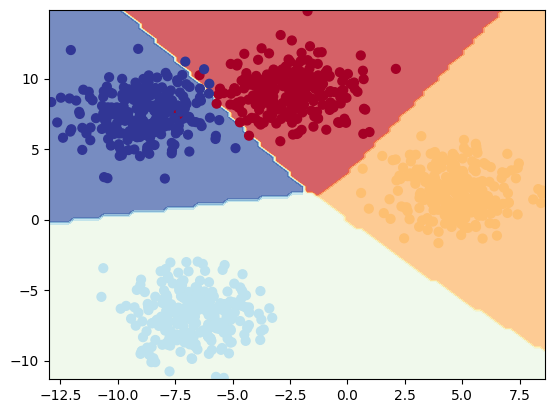

In [1656]:
plot_decision_boundary(model=model2, X=X_blob, y=y_blob)